<img src="https://i1.sndcdn.com/avatars-000274765548-vj7h0w-t500x500.jpg" style='float:right; width:200px; margin: 0 20px;'>

<img src="https://cdn2.iconfinder.com/data/icons/popular-social-media-flat/48/Popular_Social_Media-11-512.png" style='float:right; width:200px; margin: 0 20px;'>


# Twitter V CMV topological differences 
---

> Create feature set for CMV and Twitter 

> Do comperative analysis of features

In [1]:
# env 
import sys
sys.path.append('/Users/shaimeital/code/thesis/conversant')

In [2]:
from conversant.conversation.examples.controversial_feature_extraction import *
from conversant.conversation.conversation_utils import conversation_to_dataframe

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

## Load Raw Data

In [14]:
trees_file_path = './trees_2.0.txt'
total_trees = sum(1 for _ in iter_trees_from_lines(trees_file_path))

print(f'loaded total of {total_trees}')

loaded total of 16306


## Transform to Conversation object and to feature set

In [15]:
trees = tqdm.tqdm(iter_trees_from_lines(trees_file_path), total=total_trees)

  0%|          | 0/16306 [00:00<?, ?it/s]

In [16]:
conv_reader = CMVConversationReader()
conversations = map(conv_reader.parse, trees)
sub_convs = (Conversation(child) for conv in conversations for child in conv.root.children)
sub_convs = filter(lambda c: c.size >= 5, sub_convs)
#features = map(get_features, sub_convs)

In [9]:
full_conversations = list(conversations)

100%|██████████| 16306/16306 [00:50<00:00, 323.82it/s] 


## EDA

### Mean branch participation for user in CMV
remove op and show that most users in a conversation only participaten in one branch

In [10]:
convs = pd.concat(conversation_to_dataframe(conv) for conv in full_conversations) 

In [11]:
convs.head()

,author,parent_id,depth,is_root,is_absolute_root,is_leaf,timestamp,conversation_id,full_conv_id,data.text,...,data.extra_data.name,data.extra_data.ups,data.extra_data.mod_reason_by,data.extra_data.mod_reason_title,data.extra_data.mod_note,data.extra_data.author_cakeday,data.extra_data.send_replies,data.extra_data.no_follow,data.extra_data.crosspost_parent,data.extra_data.crosspost_parent_list
node_id,,,,,,,,,,,,,,,,,,,,,
6kn9gy,badparentthro,None,0,True,True,True,1498919337,6kn9gy,6kn9gy,[removed],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7f53sk,[deleted],None,0,True,True,False,1511499160,7f53sk,7f53sk,[deleted],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dq9kszi,Milskidasith,7f53sk,1,False,False,True,1511500750,7f53sk,7f53sk,I'm not going to argue that the economics and ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dq9m8km,DangerousHarvey,7f53sk,1,False,False,False,1511503414,7f53sk,7f53sk,I'd argue that our political problems outweigh...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dq9mxr5,mergerr,dq9m8km,2,False,False,False,1511504807,7f53sk,7f53sk,So you're saying that our foreign occupation a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
roots = convs.loc[convs.is_root == True][['author', 'full_conv_id']]
roots

,author,full_conv_id
node_id,,
6kn9gy,badparentthro,6kn9gy
7f53sk,[deleted],7f53sk
6ozbfi,jbowmann,6ozbfi
7f30fw,TBSchemer,7f30fw
6g7ct0,benjomaga,6g7ct0
...,...,...
6p9ano,[deleted],6p9ano
7rnozm,belllaFour,7rnozm
7nkm66,[deleted],7nkm66


In [13]:
def conversattion_to_dataframe_filter_root(conv):
    conv = conversation_to_dataframe(conv)
    full_conv_id = conv.full_conv_id[:1].values[0]
    root_author_name = roots.loc[roots.full_conv_id == full_conv_id].author.values[0]
    return conv.loc[conv.author != root_author_name]

In [17]:
data = pd.concat(conversattion_to_dataframe_filter_root(conv) for conv in sub_convs) 

100%|██████████| 16306/16306 [03:39<00:00, 74.23it/s] 


In [18]:
user_participation=pd.DataFrame(data.groupby(['author', 'conversation_id']).timestamp.count())\
                    .rename({'timestamp': '#participation'}, axis=1)
user_participation.head()

#participation
author             conversation_id                
----______-------- d53fznq                       1
---Kaiser          dfqj4uh                       3
                   dgb18vr                       1
                   dglyz0w                       1
                   ditjei5                       1

In [19]:
mean_branch_participation = pd.DataFrame(user_participation.groupby('author')['#participation'].mean()).\
                            rename({'#participation': 'mean_branch_participation'}, axis=1)
mean_branch_participation.head()

,mean_branch_participation
author,
----______--------,1.000000
---Kaiser,2.375000
--Aeo--,7.111111
--IIII--------IIII--,1.333333
--WhiteFang--,1.000000


Text(0.5, 0, 'time (s)')

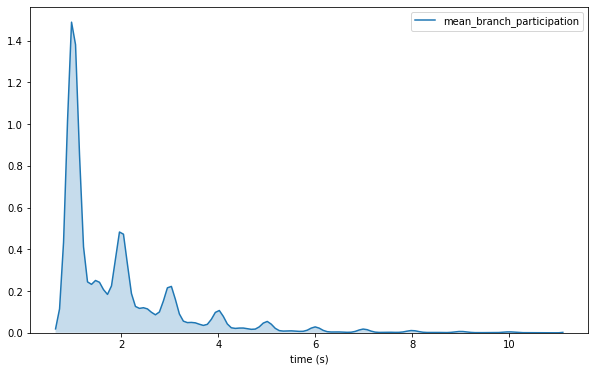

In [20]:
_, ax = plt.subplots(figsize=(10,6))
ax = sns.kdeplot(mean_branch_participation\
            .loc[mean_branch_participation.mean_branch_participation <11].\
            mean_branch_participation, shade=True)
plt.xlabel('time (s)')

In [21]:
bins = [0,1,2,3,4,5,6,7,8,9,72]

In [22]:
mean_branch_participation['mean_par_bin'] = pd.cut(mean_branch_participation.mean_branch_participation, bins=bins)

In [23]:
mean_branch_participation

,mean_branch_participation,mean_par_bin
author,,
----______--------,1.000000,"(0, 1]"
---Kaiser,2.375000,"(2, 3]"
--Aeo--,7.111111,"(7, 8]"
--IIII--------IIII--,1.333333,"(1, 2]"
--WhiteFang--,1.000000,"(0, 1]"
...,...,...
zzMojaveExpress,2.115385,"(2, 3]"
zzay,1.000000,"(0, 1]"
zzupdown,1.666667,"(1, 2]"


In [24]:
mean_branch_participation.describe()

,mean_branch_participation
count,34488.000000
mean,1.982290
std,1.774244
min,1.000000
25%,1.000000
50%,1.400000
75%,2.250000
max,75.000000


In [25]:
bin_participation = mean_branch_participation.groupby('mean_par_bin').count()
bin_participation

,mean_branch_participation
mean_par_bin,
"(0, 1]",15691
"(1, 2]",9619
"(2, 3]",4820
"(3, 4]",2150
"(4, 5]",993
"(5, 6]",451
"(6, 7]",252
"(7, 8]",154
"(8, 9]",95


In [26]:
bin_participation = bin_participation.reset_index()
bin_participation

,mean_par_bin,mean_branch_participation
0,"(0, 1]",15691
1,"(1, 2]",9619
2,"(2, 3]",4820
3,"(3, 4]",2150
4,"(4, 5]",993
5,"(5, 6]",451
6,"(6, 7]",252
7,"(7, 8]",154
8,"(8, 9]",95
9,"(9, 72]",262


In [27]:
bin_participation.mean_branch_participation.sum()

34487

In [28]:
percen = bin_participation.mean_branch_participation.apply(lambda x: x / 37264)

In [29]:
bin_participation = bin_participation.assign(perc = percen)
bin_participation

,mean_par_bin,mean_branch_participation,perc
0,"(0, 1]",15691,0.421077
1,"(1, 2]",9619,0.258131
2,"(2, 3]",4820,0.129347
3,"(3, 4]",2150,0.057696
4,"(4, 5]",993,0.026648
5,"(5, 6]",451,0.012103
6,"(6, 7]",252,0.006763
7,"(7, 8]",154,0.004133
8,"(8, 9]",95,0.002549
9,"(9, 72]",262,0.007031


Text(0.5, 0, 'mean participation bin')

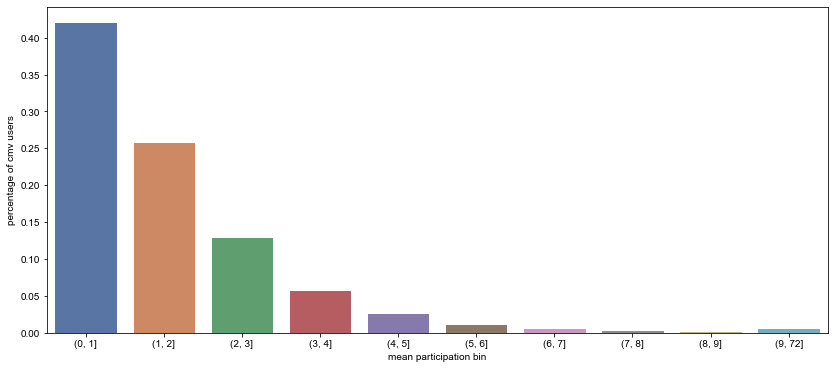

In [30]:
_, ax = plt.subplots(figsize=(14,6))
sns.set_style("whitegrid")
ax = sns.barplot(data=bin_participation, x = 'mean_par_bin', y= 'perc', palette="deep")
plt.ylabel('percentage of cmv users')
plt.xlabel('mean participation bin')

## Some Feature Extraction

In [33]:
# example of one branch 
conv = data.loc[data.conversation_id == 'dq95b41']
conv

,author,parent_id,depth,is_root,is_absolute_root,is_leaf,timestamp,conversation_id,full_conv_id,data.text,...,data.extra_data.subreddit,data.extra_data.parent_id,data.extra_data.link_id,data.extra_data.permalink,data.timestamp,data.extra_data.ups,data.extra_data.author_cakeday,data.extra_data.mod_reason_by,data.extra_data.mod_reason_title,data.extra_data.mod_note
node_id,,,,,,,,,,,,,,,,,,,,,
dq95b41,Bodoblock,7f30fw,1,True,False,False,1511477207,dq95b41,7f30fw,"Bitcoin gets hyped all the time here, and it's...",...,changemyview,t3_7f30fw,t3_7f30fw,/r/changemyview/comments/7f30fw/cmv_once_an_in...,1511477207,NaN,NaN,NaN,NaN,NaN
dq95qp4,Pavikold,dq95b41,2,False,False,False,1511477803,dq95b41,7f30fw,I came here to say that. I was introduced to B...,...,changemyview,t1_dq95b41,t3_7f30fw,/r/changemyview/comments/7f30fw/cmv_once_an_in...,1511477803,NaN,NaN,NaN,NaN,NaN
dqaaaec,Pavikold,dqa6nxr,4,False,False,False,1511549168,dq95b41,7f30fw,"My understanding of bitcoin is limited, but fr...",...,changemyview,t1_dqa6nxr,t3_7f30fw,/r/changemyview/comments/7f30fw/cmv_once_an_in...,1511549168,NaN,NaN,NaN,NaN,NaN
dqaow6z,Dopecheez-,dqaaaec,5,False,False,True,1511567849,dq95b41,7f30fw,Why would anyone spend a currency that constan...,...,changemyview,t1_dqaaaec,t3_7f30fw,/r/changemyview/comments/7f30fw/cmv_once_an_in...,1511567849,NaN,NaN,NaN,NaN,NaN
dqa7q3h,Bodoblock,dqa6myb,3,False,False,False,1511545989,dq95b41,7f30fw,"Dude, unless you're actually reading financial...",...,changemyview,t1_dqa6myb,t3_7f30fw,/r/changemyview/comments/7f30fw/cmv_once_an_in...,1511545989,NaN,NaN,NaN,NaN,NaN
dqbf2e2,jzpenny,dqa7q3h,4,False,False,True,1511619397,dq95b41,7f30fw,"<quote> Dude, unless you're actually reading f...",...,changemyview,t1_dqa7q3h,t3_7f30fw,/r/changemyview/comments/7f30fw/cmv_once_an_in...,1511619397,NaN,NaN,NaN,NaN,NaN
dqao093,ccricers,dqa6myb,3,False,False,True,1511566661,dq95b41,7f30fw,<quote>It's pure hype at this point.</quote> I...,...,changemyview,t1_dqa6myb,t3_7f30fw,/r/changemyview/comments/7f30fw/cmv_once_an_in...,1511566661,NaN,NaN,NaN,NaN,NaN


In [53]:
def count_op_involvment(subconv:pd.DataFrame, roots:pd.DataFrame) -> float:
    """
    counts the proportion of posts from the full conversation author in the subconversation
    """
    full_conversation_id = conv.sample(1).full_conv_id.values[0]
    op = roots.loc[roots.full_conv_id == full_conversation_id].author.values[0]
    return len(conv.loc[conv.author == op]) / len(conv)

In [ ]:
# data = pd.DataFrame.from_records(features, index="conv_id")
# print(data.head())

In [ ]:
data_ = data.loc[data.num_nodes > 10]

In [ ]:
data_.count()

In [ ]:
data_

In [ ]:
data_.describe()

In [ ]:
data_ = data_.fillna(0)

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


In [ ]:
standardized_data = StandardScaler().fit_transform(data_)
print(standardized_data.shape)

In [ ]:
model = TSNE(n_components=2, random_state=0)

In [ ]:
tsne_data = model.fit_transform(standardized_data)

In [ ]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.FacetGrid(tsne_df, height=9).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN


In [ ]:
m = DBSCAN()


In [ ]:
m.fit(standardized_data)

In [ ]:
clusters = m.labels_

In [ ]:
pd.Series(clusters).value_counts()

In [ ]:
# pca

from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components=2)


In [ ]:
principalComponents = pca.fit_transform(standardized_data)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
sns.FacetGrid(principalDf, height=6).map(plt.scatter, 'principal component 1', 'principal component 2').add_legend()
plt.show()